In [2]:
import json
import re

class EmojiDecode():

  def __init__(self, emoji_path):
    emoji_file = open(emoji_path) 
    self.emojis = json.load(emoji_file)

  def multiple_replace(self, di, text):
    regex = re.compile("(%s)" % "|".join(map(re.escape, di.keys())))

    return regex.sub(lambda mo: di[mo.string[mo.start():mo.end()]], text) 

  def filter_emojis(self, by_replace):
    return {i : self.emojis[i] for i in by_replace if i in self.emojis.keys()}    

  def replace_emoji(self, text):
    by_replace = list(set(re.findall(r'[^\w\s,]', text)))

    emojis = self.filter_emojis(by_replace)

    return self.multiple_replace(emojis, text)    

In [ ]:
emoji = EmojiDecode('emoticones.json')

emoji.replace_emoji('😀 hola 🤛 que hace 😆')

In [19]:
#Import libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [35]:
#import dataset
import pandas as pd
df1 = pd.read_excel("dataset_twitter.xlsx")

In [ ]:

train = pd.read_excel('dataset_twitter.xlsx')

print(train.shape)


In [37]:
train.head()

,Tweet,Y
0,.omg por qué se lleva poc fugly contactos azul...,noAcoso
1,"Apesadumbrado, pero la mayoría de los corredor...",noAcoso
2,".Los jeans son horrible, y yo? m miedo de que?...",noAcoso
3,.I tuvo que vestirse para una presentación en ...,noAcoso
4,.Am yo el único que piensa que Justin Bieber e...,noAcoso


In [38]:
# checking out the negative comments from the train set

train[train['Y'] == "noAcoso"].head(10)

,Tweet,Y
0,.omg por qué se lleva poc fugly contactos azul...,noAcoso
1,"Apesadumbrado, pero la mayoría de los corredor...",noAcoso
2,".Los jeans son horrible, y yo? m miedo de que?...",noAcoso
3,.I tuvo que vestirse para una presentación en ...,noAcoso
4,.Am yo el único que piensa que Justin Bieber e...,noAcoso
5,"¿Continuamos? Nosotros, como en el lookin fugl...",noAcoso
6,"Don? T sabe qué? S peor, el hecho de que él? S...",noAcoso
7,Disfrutar de su New Smyrna Beach..full de alg...,noAcoso
8,Sí honestamente que? S fugly.,noAcoso
9,Nadie quiere ver a esas motos fugly 3T?,noAcoso


In [40]:
# checking out the negative comments from the train set

train[train['Y'] == "acoso"].head(10)

,Tweet,Y
638,Usted buena fugly.,acoso
639,Ese mensaje Fugly lib patanes camiseta es tan ...,acoso
640,Esta chica es la más repugnante skank perra qu...,acoso
641,"pase duro? '' Debe ser utilizado para oír eso,...",acoso
642,La cogida que le pasó a la barbilla chicos? ' ...,acoso
643,.everybody en la estancia justo alegando que s...,acoso
644,.Lookin verdadera fugly.,acoso
645,"Esa es una fugly puta!"", 'Todo lo que se ve $$...",acoso
646,Ella? S A fugly pos.,acoso
647,"Oh, lo sé. ' 'Ese tipo es un idiota.',' La gen...",acoso


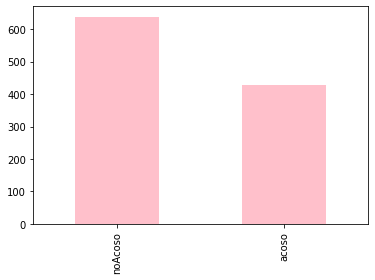

In [41]:
train['Y'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

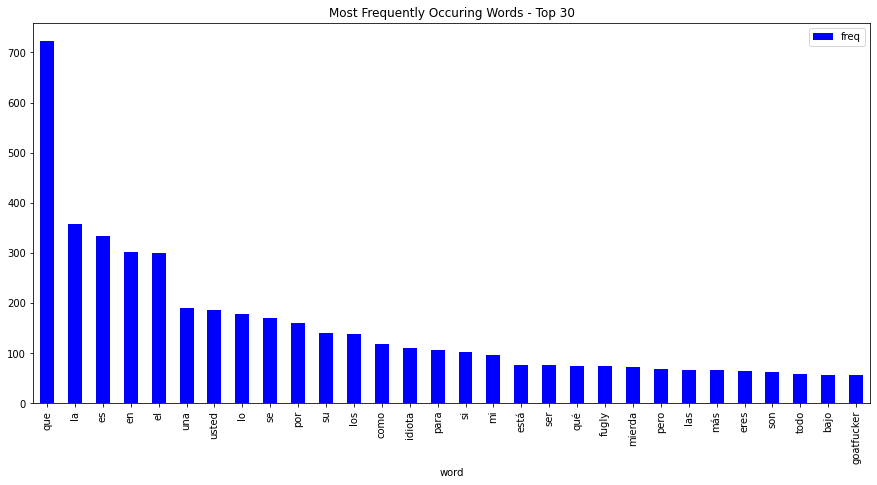

In [42]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.Tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulario de revisiones')

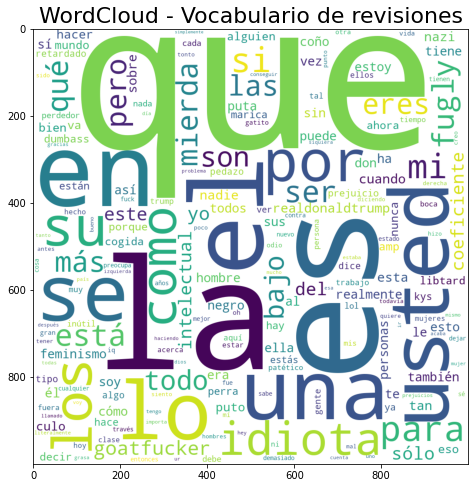

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulario de revisiones", fontsize = 22)

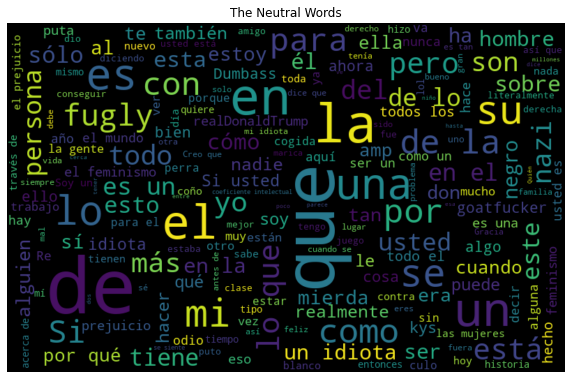

In [45]:
normal_words =' '.join([text for text in train['Tweet'][train['Y'] == "noAcoso"]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

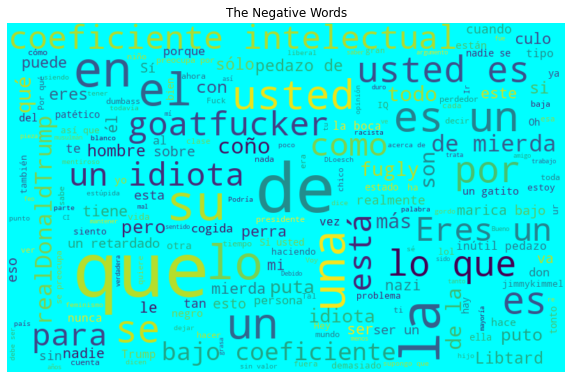

In [46]:

negative_words =' '.join([text for text in train['Tweet'][train['Y'] == "acoso"]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
#Create lists for tweets and label
Tweet = []
Labels = []

for row in df1["Tweet"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('spanish'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

    for row in df1["Y"]:
        Labels.append(row)

In [8]:
#Combine lists
combined = zip(Tweet, Labels)

In [ ]:
#Create bag of words
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [ ]:
#Create new list for modeling
Final_Data = []
for r, v in combined:
    bag_of_words(r)
    Final_Data.append((bag_of_words(r),v))

In [ ]:
import random
random.shuffle(Final_Data)
print(len(Final_Data))

1065


In [ ]:
#Split the data into training and test
train_set, test_set = Final_Data[0:746], Final_Data[746:]

In [ ]:
#Naive Bayes for Unigramsm check accuracy
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics

In [ ]:
refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Unigrams 
Accuracy: 0.6551724137931034


In [ ]:
#Naive Bayes for Unigrams, Recall Measure
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

nbrefset = collections.defaultdict(set)
nbtestset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    nbrefset[label].add(i)
    observed = nb_classifier.classify(feats)
    nbtestset[observed].add(i)
print("UnigramNB Recall")
print('acoso recall:', recall(nbtestset['acoso'], nbrefset['acoso']))
print("")

UnigramNB Recall
acoso recall: 0.5592105263157895



In [ ]:
#Find most informative features
classifier.show_most_informative_features(n=10)

Most Informative Features
                  pedazo = True            acoso : noAcos =     12.4 : 1.0
                 alguien = True           noAcos : acoso  =      7.8 : 1.0
             coeficiente = True            acoso : noAcos =      7.7 : 1.0
             intelectual = True            acoso : noAcos =      7.7 : 1.0
                    bajo = True            acoso : noAcos =      7.7 : 1.0
                     hey = True            acoso : noAcos =      6.5 : 1.0
                      ur = True            acoso : noAcos =      6.5 : 1.0
               retardado = True            acoso : noAcos =      6.3 : 1.0
                       m = True           noAcos : acoso  =      5.8 : 1.0
                    coño = True            acoso : noAcos =      4.7 : 1.0


In [ ]:
#Decision Tree for Unigrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("UnigramDT Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

UnigramDT Recall
Bullying recall: 0.6944444444444444



In [ ]:
#Logisitic Regression for Unigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("UnigramsLogit Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

UnigramsLogit Recall
acoso recall: 0.6608695652173913



In [ ]:
#Support Vector Machine for Unigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("UnigramSVM Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))

UnigramSVM Recall
acoso recall: 0.632


In [ ]:
#Same thing with Bigrams
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [ ]:
combined = zip(Tweet,Labels)

In [ ]:
#Bag of Words of Bigrams
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)  
    bigrams = bigram_finder.nbest(score_fn, n)  
    return bag_of_words(bigrams)

In [ ]:
Final_Data2 =[]

for z, e in combined:
    bag_of_bigrams_words(z)
    Final_Data2.append((bag_of_bigrams_words(z),e))

In [ ]:
#Naive Bayes for Bigrams

refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))


Naive Bayes Performance with Bigrams 
Accuracy: 0.6551724137931034


In [ ]:
# In[20]:


classifier.show_most_informative_features(n=10)


# In[21]:


print("BigramDT Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

Most Informative Features
                  pedazo = True            acoso : noAcos =     12.4 : 1.0
                 alguien = True           noAcos : acoso  =      7.8 : 1.0
             coeficiente = True            acoso : noAcos =      7.7 : 1.0
             intelectual = True            acoso : noAcos =      7.7 : 1.0
                    bajo = True            acoso : noAcos =      7.7 : 1.0
                     hey = True            acoso : noAcos =      6.5 : 1.0
                      ur = True            acoso : noAcos =      6.5 : 1.0
               retardado = True            acoso : noAcos =      6.3 : 1.0
                       m = True           noAcos : acoso  =      5.8 : 1.0
                    coño = True            acoso : noAcos =      4.7 : 1.0
BigramDT Recall
Bullying recall: 0.632



In [ ]:
#Decision Tree for Bigrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("BigramDT Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

BigramDT Recall
Bullying recall: 0.6944444444444444



In [ ]:
#Logistic Regression for Bigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("BigramsLogit Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

BigramsLogit Recall
Bullying recall: 0.6608695652173913



In [ ]:
#Support Vector Machine for Bigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Bigrams Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))


Bigrams Recall
Bullying recall: 0.632


In [ ]:
combined = zip(Tweet,Labels)

In [ ]:
#Same thing with Trigrams
from nltk import bigrams, trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

def bag_of_trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)  
    trigrams = trigram_finder.nbest(score_fn, n)  
    return bag_of_words(trigrams)

In [ ]:
Final_Data3 =[]

for z, e in combined:
    bag_of_trigrams_words(z)
    Final_Data3.append((bag_of_trigrams_words(z),e))

import random
random.shuffle(Final_Data3)
print(len(Final_Data3))

train_set, test_set = Final_Data3[0:747], Final_Data3[747:]

1065


In [ ]:

#Naive Bayes for Trigrams
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Trigrams 
Accuracy: 0.6132075471698113


In [ ]:
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))

acoso precision: 0.84
acoso recall: 0.15


In [ ]:
classifier.show_most_informative_features(n=10)

Most Informative Features
('bajo', 'coeficiente', 'intelectual') = True            acoso : noAcos =      8.0 : 1.0
       ('i', 'don', 't') = True            acoso : noAcos =      2.7 : 1.0
   ('usted', 'don', 't') = True            acoso : noAcos =      2.7 : 1.0
('perras', 'fugly', 'tabaquismo') = True            acoso : noAcos =      1.6 : 1.0
('low-iq-arabistas', 'tratan', 'borrones') = True            acoso : noAcos =      1.6 : 1.0
('identificar', 'w', 'arabismo') = True            acoso : noAcos =      1.6 : 1.0
('minorías', 'racistas', 'don') = True            acoso : noAcos =      1.6 : 1.0
('individuo', 'bajo', 'coeficiente') = True            acoso : noAcos =      1.6 : 1.0
('racistas', 'don', "'t") = True            acoso : noAcos =      1.6 : 1.0
('coeficiente', 'intelectual', 'bajo') = True            acoso : noAcos =      1.6 : 1.0


In [ ]:
#Decision Tree for Trigrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("TrigramDT Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

TrigramDT Recall
acoso recall: 0.9



In [ ]:
#Logistic Regression for Trigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("TrigramsLogit Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

TrigramsLogit Recall
Bullying recall: 0.84



In [ ]:
#Support Vector Machine for Trigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Trigrams Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))

Trigrams Recall
Bullying recall: 0.84


In [ ]:
combined = zip(Tweet,Labels)

In [ ]:
#Combine both unigrams, bigrams, and trigrams

# Import Bigram metrics - we will use these to identify the top 200 bigrams
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq,
n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

from nltk.collocations import TrigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 trigrams 
from nltk.metrics import TrigramAssocMeasures

def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq,
n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams

#bag of ngrams
def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [ ]:
Final_Data4 =[]

for z, e in combined:
    bag_of_Ngrams_words(z)
    Final_Data4.append((bag_of_Ngrams_words(z),e))

In [ ]:

import random
random.shuffle(Final_Data4)
print(len(Final_Data4))

train_set, test_set = Final_Data4[0:747], Final_Data4[747:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics
#Naive Bayes for Ngrams

refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

1065
Naive Bayes Performance with Ngrams 
Accuracy: 0.6666666666666666


In [ ]:
classifier.show_most_informative_features(n=10)

Most Informative Features
                  inútil = True            acoso : noAcos =      9.4 : 1.0
                patético = True            acoso : noAcos =      9.4 : 1.0
                 alguien = True           noAcos : acoso  =      7.4 : 1.0
                      ur = True            acoso : noAcos =      7.4 : 1.0
                    bajo = True            acoso : noAcos =      7.2 : 1.0
                      .i = True           noAcos : acoso  =      7.0 : 1.0
               retardado = True            acoso : noAcos =      6.8 : 1.0
bajo coeficiente intelectual = True            acoso : noAcos =      6.6 : 1.0
        bajo coeficiente = True            acoso : noAcos =      6.6 : 1.0
               prejuicio = True           noAcos : acoso  =      6.5 : 1.0


In [ ]:
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))

bullying precision: 0.5617283950617284
bullying recall: 0.7222222222222222


In [ ]:
#Decision Tree for Ngrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("NgramDT Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

NgramDT Recall
acoso recall: 0.6714285714285714



In [ ]:
#Logistic Regression for Ngrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("NgramsLogit Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))
print("")

NgramsLogit Recall
acoso recall: 0.5964912280701754



In [ ]:
#Support Vector Machine for Ngrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Trigrams Recall")
print('acoso recall:', recall(testset['acoso'], refset['acoso']))

Trigrams Recall
acoso recall: 0.5714285714285714


In [ ]:
train_set, test_set = Final_Data[0:747], Final_Data[747:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

from nltk.classify.util import accuracy
print(accuracy(nb_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))
print('acoso F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('noAcoso precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

Most Informative Features
                  pedazo = True            acoso : noAcos =     12.5 : 1.0
                 alguien = True           noAcos : acoso  =      7.8 : 1.0
             coeficiente = True            acoso : noAcos =      7.8 : 1.0
             intelectual = True            acoso : noAcos =      7.8 : 1.0
                    bajo = True            acoso : noAcos =      7.7 : 1.0
                     hey = True            acoso : noAcos =      6.5 : 1.0
                      ur = True            acoso : noAcos =      6.5 : 1.0
               retardado = True            acoso : noAcos =      6.3 : 1.0
                       m = True           noAcos : acoso  =      5.7 : 1.0
                    coño = True            acoso : noAcos =      4.7 : 1.0
0.6540880503144654
acoso precision: 0.5584415584415584
acoso recall: 0.671875
acoso F-measure: 0.6099290780141844
noAcoso precision: 0.7439024390243902
noAcoso recall: 0.6421052631578947
noAcoso F-measure: 0.6892655367231638

In [ ]:
import collections
from nltk import metrics
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
from nltk.classify import DecisionTreeClassifier
from nltk.classify.util import accuracy
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
from nltk.classify.util import accuracy
print(accuracy(dt_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))
print('acoso F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('non-bullying precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('non-bullying recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('non-bullying F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

0.6855345911949685
acoso precision: 0.6944444444444444
acoso recall: 0.390625
acoso F-measure: 0.5
non-bullying precision: 0.6829268292682927
non-bullying recall: 0.8842105263157894
non-bullying F-measure: 0.7706422018348625


In [ ]:
#Create Logistic Regression model to compare
from nltk.classify import MaxentClassifier
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)
 
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(Final_Data)
    testsets[observed].add(i)
  
print('pos precision:', precision(refsets['acoso'], testsets['noAcoso']))
print('pos recall:', recall(refsets['acoso'], testsets['noAcoso']))
print('pos F-measure:', f_measure(refsets['acoso'], testsets['noAcoso']))
print('neg precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('neg recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('neg F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))



pos precision: 0.3357664233576642
pos recall: 0.71875
pos F-measure: 0.4577114427860696
neg precision: 0.6642335766423357
neg recall: 0.9578947368421052
neg F-measure: 0.7844827586206897


In [ ]:
# SVM model

from nltk.classify import SklearnClassifier
from sklearn.svm import SVC

SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = SVM_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('pos precision:', precision(refsets['acoso'], testsets['acoso']))
print('pos recall:', recall(refsets['acoso'], testsets['acoso']))
print('pos F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('neg precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('neg recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('neg F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

pos precision: 0.632
pos recall: 0.6171875
pos F-measure: 0.6245059288537549
neg precision: 0.6618181818181819
neg recall: 0.9578947368421052
neg F-measure: 0.7827956989247312


In [ ]:
zl = zip(Tweet,Labels)

#define a bag_of_words function to return word, True.

def bag_of_words(words):
    return dict([(word, True) for word in words])

def bag_of_words_not_in_set(words, badwords):
    return bag_of_words(set(words) - set(badwords))

# Define another function that will return words that are in words, but not in badwords

from nltk.corpus import stopwords

#define a bag_of_non_stopwords function to return word, True.

def bag_of_non_stopwords(words, stopfile='spanish'):
    badwords = stopwords.words(stopfile)
    return bag_of_words_not_in_set(words, badwords)

from nltk.collocations import BigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import BigramAssocMeasures

def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bag_of_words(bigrams)
    
    bigrams = bag_of_bigrams_words(words)

#Creating our unigram featureset dictionary for modeling

Final_Data = []

for k, v in zl:
    bag_of_bigrams_words(k)
    Final_Data.append((bag_of_bigrams_words(k),v))

import random
random.shuffle(Final_Data)

#splits the data around 70% of 500 *350 reviews* for both testing and training

train_set, test_set = Final_Data[0:778], Final_Data[778:]

#Now we will calculate accuracy, precision, recall, and f-measure using Naives Bayes classifier

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

from nltk.classify.util import accuracy
print(accuracy(nb_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))
print('acoso F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('noAcoso precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

Most Informative Features
    ('pedazo', 'mierda') = True            acoso : noAcos =     10.8 : 1.0
 ('bajo', 'coeficiente') = True            acoso : noAcos =     10.0 : 1.0
     ('usted', 'idiota') = True            acoso : noAcos =      8.8 : 1.0
    ('inútil', 'pedazo') = True            acoso : noAcos =      8.8 : 1.0
('coeficiente', 'intelectual') = True            acoso : noAcos =      6.9 : 1.0
          ('puede', 't') = True            acoso : noAcos =      4.6 : 1.0
         ('debe', 'ser') = True            acoso : noAcos =      4.6 : 1.0
              ('i', 'm') = True           noAcos : acoso  =      3.7 : 1.0
        ('puto', 'coño') = True            acoso : noAcos =      3.4 : 1.0
          ('tal', 'vez') = True            acoso : noAcos =      2.6 : 1.0
0.662020905923345
acoso precision: 0.676056338028169
acoso recall: 0.39344262295081966
acoso F-measure: 0.4974093264248705
noAcoso precision: 0.6574074074074074
noAcoso recall: 0.8606060606060606
noAcoso F-measure: 0.7

In [ ]:
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq,
n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

from nltk.collocations import TrigramCollocationFinder

# Import Bigram metrics - we will use these to identify the top 200 bigrams
from nltk.metrics import TrigramAssocMeasures

def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq,
n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams


def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [ ]:
zl = zip(Tweet,Labels)

Final_Data = []

for k, v in zl:
    bag_of_words(k)
    Final_Data.append((bag_of_words(k),v))

import random
random.shuffle(Final_Data)

#splits the data around 70% of 500 *350 reviews* for both testing and training

train_set, test_set = Final_Data[0:778], Final_Data[778:]

#Now we will calculate accuracy, precision, recall, and f-measure using Naives Bayes classifier

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

from nltk.classify.util import accuracy
print(accuracy(nb_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))
print('acoso F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('noAcoso precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('noAcoso F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

Most Informative Features
                  pedazo = True            acoso : noAcos =     16.9 : 1.0
                    boca = True            acoso : noAcos =     11.1 : 1.0
                 alguien = True           noAcos : acoso  =      8.1 : 1.0
                      ur = True            acoso : noAcos =      7.2 : 1.0
                   gente = True           noAcos : acoso  =      7.2 : 1.0
                      .i = True           noAcos : acoso  =      7.2 : 1.0
                    bajo = True            acoso : noAcos =      7.0 : 1.0
                     amp = True           noAcos : acoso  =      6.7 : 1.0
               retardado = True            acoso : noAcos =      6.6 : 1.0
                 libtard = True            acoso : noAcos =      6.0 : 1.0
0.7073170731707317
acoso precision: 0.5899280575539568
acoso recall: 0.7522935779816514
acoso F-measure: 0.6612903225806451
noAcoso precision: 0.8175675675675675
noAcoso recall: 0.6797752808988764
noAcoso F-measure: 0.742331

In [ ]:
import collections
from nltk import metrics
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
from nltk.classify import DecisionTreeClassifier
from nltk.classify.util import accuracy
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
from nltk.classify.util import accuracy
print(accuracy(dt_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('acoso precision:', precision(refsets['acoso'], testsets['acoso']))
print('acoso recall:', recall(refsets['acoso'], testsets['acoso']))
print('acoso F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('non-bullying precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('non-bullying recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('non-bullying F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

0.7421602787456446
acoso precision: 0.7611940298507462
acoso recall: 0.46788990825688076
acoso F-measure: 0.5795454545454545
non-bullying precision: 0.7363636363636363
non-bullying recall: 0.9101123595505618
non-bullying F-measure: 0.8140703517587938


In [ ]:
#Create Logistic Regression model to compare
from nltk.classify import MaxentClassifier
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)
 
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(Final_Data)
    testsets[observed].add(i)
  
print('pos precision:', precision(refsets['acoso'], testsets['noAcoso']))
print('pos recall:', recall(refsets['acoso'], testsets['noAcoso']))
print('pos F-measure:', f_measure(refsets['acoso'], testsets['noAcoso']))
print('neg precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('neg recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('neg F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

pos precision: 0.2938775510204082
pos recall: 0.6605504587155964
pos F-measure: 0.4067796610169492
neg precision: 0.7061224489795919
neg recall: 0.9719101123595506
neg F-measure: 0.817966903073286


In [ ]:
# SVM model

from nltk.classify import SklearnClassifier
from sklearn.svm import SVC

SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = SVM_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('pos precision:', precision(refsets['acoso'], testsets['acoso']))
print('pos recall:', recall(refsets['acoso'], testsets['acoso']))
print('pos F-measure:', f_measure(refsets['acoso'], testsets['acoso']))
print('neg precision:', precision(refsets['noAcoso'], testsets['noAcoso']))
print('neg recall:', recall(refsets['noAcoso'], testsets['noAcoso']))
print('neg F-measure:', f_measure(refsets['noAcoso'], testsets['noAcoso']))

pos precision: 0.6299212598425197
pos recall: 0.7339449541284404
pos F-measure: 0.6779661016949153
neg precision: 0.7061224489795919
neg recall: 0.9719101123595506
neg F-measure: 0.817966903073286
